<center><h1>Sun_Kaiyi_HW3</h1></center>
<br>
<br>

Name: Sun, Kaiyi
<br>
Github Username:KaiyiSss
<br>
USC ID: 6511379529

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [55]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.ensemble import RandomForestRegressor

Get the AReM Data Set

In [56]:
def getdataframes(files):
    dataframes = []
    for dataset in files:
        dataset = pd.read_csv(dataset, skiprows=4)
        dataset.columns =['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23' ,'var_rss23']
        dataframes.append(dataset)
    return dataframes

##### Bending 1

In [57]:
path_1 = '../data/AReM/bending1/*.csv'
files_1 = glob.glob(path_1)
df_bending1 = getdataframes(files_1)

##### Bending2

In [58]:
path_2 = '../data/AReM/bending2/*.csv'
files_2 = glob.glob(path_2)
df_bending2 = getdataframes(files_2)

##### Cycling

In [59]:
path_3 = '../data/AReM/cycling/*.csv'

files_3 = glob.glob(path_3)
df_cycling = getdataframes(files_3)

##### Lying

In [60]:
path_4 = '../data/AReM/lying/*.csv'

files_4 = glob.glob(path_4)
df_lying = getdataframes(files_4)

##### Sitting

In [61]:
path_5 = '../data/AReM/sitting/*.csv'
files_5 = glob.glob(path_5)
df_sitting = getdataframes(files_5)

##### Standing

In [62]:
path_6 = '../data/AReM/standing/*.csv'
files_6 = glob.glob(path_6)
df_standing = getdataframes(files_6)


##### Walking

In [63]:
path_7 = '../data/AReM/walking/*.csv'
files_7 = glob.glob(path_7)
df_walking = getdataframes(files_7)


### (b) Test and Train Data

Test data

In [64]:
#test data from bending1 and bending2
##test data from bending1
test_bending1 = pd.concat([df_bending1[0], df_bending1[1]])
##test data from bending2
test_bending2 = pd.concat([df_bending2[0], df_bending2[1]])
#test data from other datasets
##cycling
test_cycling = pd.concat([df_cycling[0], df_cycling[1], df_cycling[2]])
##lying
test_lying = pd.concat([df_lying[0], df_lying[1], df_lying[2]])
##sitting
test_sitting = pd.concat([df_sitting[0], df_sitting[1], df_sitting[2]])
##standing
test_standing = pd.concat([df_standing[0], df_standing[1], df_standing[2]])
##walking
test_walking = pd.concat([df_walking[0], df_walking[1], df_walking[2]])
#test data
test = pd.concat([test_bending1, test_bending2, test_cycling, test_lying, test_sitting, test_standing, test_walking])
test

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.30
1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,500,39.25,0.43,23.25,0.43,33.00,0.00
3,750,39.50,0.50,23.00,0.71,33.00,0.00
4,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
475,118750,36.50,2.87,18.50,2.29,16.00,2.16
476,119000,35.00,9.70,18.67,0.94,18.33,2.05
477,119250,28.25,4.82,16.00,3.27,22.00,5.66
478,119500,32.25,8.26,12.50,4.15,15.25,2.77


Train data

In [65]:
#train data from bending1 and bending2
##train data from bending1
train_bending1 = pd.concat([df_bending1[2], df_bending1[3], df_bending1[4],  df_bending1[5],  df_bending1[6]])
##test data from bending2
train_bending2 = pd.concat([df_bending2[2], df_bending2[3], df_bending2[4], df_bending2[5]])
#test data from other datasets
##cycling
train_cycling = pd.concat([df_cycling[3], df_cycling[4], df_cycling[5],
                           df_cycling[6], df_cycling[7], df_cycling[8],
                           df_cycling[9], df_cycling[10], df_cycling[11],
                           df_cycling[12], df_cycling[13], df_cycling[14]])
##lying
train_lying = pd.concat([df_lying[3], df_lying[4], df_lying[5],
                           df_lying[6], df_lying[7], df_lying[8],
                           df_lying[9], df_lying[10], df_lying[11],
                           df_lying[12], df_lying[13], df_lying[14]])
##sitting
train_sitting = pd.concat([df_sitting[3], df_sitting[4], df_sitting[5],
                           df_sitting[6], df_sitting[7], df_sitting[8],
                           df_sitting[9], df_sitting[10], df_sitting[11],
                           df_sitting[12], df_sitting[13], df_sitting[14]])
##standing
train_standing = pd.concat([df_standing[3], df_standing[4], df_standing[5],
                           df_standing[6], df_standing[7], df_standing[8],
                           df_standing[9], df_standing[10], df_standing[11],
                           df_standing[12], df_standing[13], df_standing[14]])
##walking
train_walking = pd.concat([df_walking[3], df_walking[4], df_walking[5],
                           df_walking[6], df_walking[7], df_walking[8],
                           df_walking[9], df_walking[10], df_walking[11],
                           df_walking[12], df_walking[13], df_walking[14]])
#test data
train = pd.concat([train_bending1, train_bending2, train_cycling, train_lying, train_sitting, train_standing, train_walking])
train

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43
...,...,...,...,...,...,...,...
475,118750,31.50,1.66,12.50,3.20,14.25,4.44
476,119000,27.33,1.25,11.33,0.94,20.00,4.00
477,119250,37.80,7.68,14.20,2.48,17.25,0.83
478,119500,33.75,1.30,15.75,5.21,16.50,2.69


### (c) Feature Extraction

#### i. Research

Simple statistical features:
Means, Standard deviations, Skewness, Kurtosis, Maximum and Minimum values

Time serie analysis related features: Orders of the autoregressive (AR), integrated (I) and moving average (MA)

Reference: https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

#### ii. Extraction

In [66]:
filter = ['mean', 'std', 'min', 'max', '25%', '75%']
columns_name = ['mean1','std1', 'min1', 'max1', 'first_quartile_1', 'third_quartile_1','median1', 'mean2', 'std2', 'min2', 'max2', 'first_quartile_2', 'third_quartile_2','median2','mean3', 'std3', 'min3', 'max3', 'first_quartile_3', 'third_quartile_3','median3','mean4', 'std4', 'min4', 'max4', 'first_quartile_4', 'third_quartile_4','median4','mean5', 'std5', 'min5', 'max5', 'first_quartile_5', 'third_quartile_5','median5','mean6', 'std6', 'min6', 'max6', 'first_quartile_6', 'third_quartile_6','median6','label']

In [67]:
# generic function to create statistics table for each dataframe 
def createStatsTable(folder_dataframe, label):
    # Create statistics table for dataframe
    stats = []
    for dataframe in folder_dataframe:
        stats_table = dataframe.drop(columns=['time']).describe().transpose()[filter]        
        stats_table['median'] = dataframe.median().transpose()
        stats.append(stats_table)
    # Create table rows
    rows = []
    for dataframe in stats:
        row = np.concatenate([np.array(dataframe.iloc[0,:]), np.array(dataframe.iloc[1,:]), np.array(dataframe.iloc[2,:]), np.array(dataframe.iloc[3,:]), np.array(dataframe.iloc[4,:]), np.array(dataframe.iloc[5,:])])
        # Add label to row
        row = np.append(row, label)
        rows.append(row)
        
    return pd.DataFrame(rows, columns=columns_name)

##### Bending1 

In [68]:
bending1_table = createStatsTable(df_bending1, 1)
bending1_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,40.624792,1.476967,37.25,45.00,39.25,42.00,40.50,0.358604,0.322605,0.0,...,36.00,35.00,0.570583,0.582915,0.0,1.92,0.00,1.30,0.43,1.0
1,42.812812,1.435550,38.00,45.67,42.00,43.67,42.50,0.372437,0.289158,0.0,...,34.50,33.00,0.571083,0.601010,0.0,3.11,0.00,1.30,0.43,1.0
2,43.954500,1.558835,35.00,47.40,43.00,45.00,44.33,0.426250,0.338690,0.0,...,36.50,36.00,0.493292,0.513506,0.0,1.79,0.00,0.94,0.43,1.0
3,42.179812,3.670666,33.00,47.75,39.15,45.00,43.50,0.696042,0.630860,0.0,...,36.33,35.00,0.613521,0.524317,0.0,2.18,0.00,1.00,0.50,1.0
4,41.678063,2.243490,33.00,45.75,41.33,42.75,41.75,0.535979,0.405469,0.0,...,31.25,30.00,0.383292,0.389164,0.0,1.79,0.00,0.50,0.43,1.0
5,43.454958,1.386098,37.00,48.00,42.50,45.00,43.25,0.378083,0.315566,0.0,...,24.00,23.50,0.679646,0.622534,0.0,5.26,0.43,0.87,0.50,1.0
6,43.969125,1.618364,36.25,48.00,43.31,44.67,44.50,0.413125,0.263111,0.0,...,23.75,21.67,0.555312,0.487826,0.0,2.96,0.00,0.83,0.49,1.0


##### Bending2

In [69]:
bending2_table = createStatsTable(df_bending2, 2)
bending2_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,24.562958,3.737514,12.75,51.00,23.1875,26.5000,24.25,0.590833,0.837408,0.0,...,27.0000,23.750,0.700188,0.693720,0.0,4.97,0.43,0.87,0.50,2.0
1,27.464604,3.583582,0.00,42.75,25.5000,30.0000,28.00,0.449708,0.767197,0.0,...,20.7500,18.000,1.122125,1.012342,0.0,6.76,0.47,1.30,0.83,2.0
2,32.586208,6.238143,21.00,50.00,26.1875,34.5000,33.00,0.516125,0.789957,0.0,...,23.5000,19.585,1.162042,1.332980,0.0,13.61,0.47,1.30,0.83,2.0
3,29.881938,1.153837,27.50,33.00,29.0000,30.2700,30.00,0.256437,0.275833,0.0,...,19.0000,18.000,0.701625,0.481103,0.0,6.40,0.47,0.94,0.71,2.0
4,30.938104,7.684146,19.00,45.50,26.7500,38.0000,29.00,0.467167,0.734444,0.0,...,20.8125,17.500,1.107354,1.080842,0.0,6.73,0.47,1.30,0.83,2.0
5,31.058250,4.829794,25.00,47.50,27.5000,31.8125,29.71,0.405458,0.566668,0.0,...,18.3125,13.000,1.098104,0.831480,0.0,4.92,0.50,1.30,0.94,2.0


##### Cycling

In [70]:
cycling_table = createStatsTable(df_cycling, 3)
cycling_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,37.177042,3.581301,24.25,45.00,34.5000,40.2500,36.250,2.374208,1.601799,0.0,...,21.7500,20.000,2.921729,1.852600,0.0,9.34,1.5000,3.9000,2.500,3.0
1,36.819521,3.900459,27.00,45.00,33.7500,40.2500,36.000,2.600146,1.821404,0.0,...,19.2700,17.415,2.887563,1.723094,0.0,8.99,1.5600,3.7700,2.525,3.0
2,36.541667,4.018922,27.00,44.33,33.2500,39.8125,36.000,2.847958,1.892397,0.0,...,19.5000,16.750,3.225458,1.769758,0.0,9.18,1.8850,4.2625,2.870,3.0
3,35.752354,4.614802,18.50,44.25,33.0000,39.3300,36.000,3.328104,2.140576,0.0,...,18.0625,16.250,3.069667,1.748326,0.0,9.39,1.7975,4.0600,2.770,3.0
4,35.879875,4.614878,19.00,43.75,33.0000,39.5000,36.000,3.414312,2.237955,0.0,...,19.6900,17.000,3.093021,1.626034,0.0,8.50,1.8900,4.0600,2.930,3.0
5,36.244083,3.822016,23.33,43.50,33.4575,39.2500,36.750,2.736021,2.092002,0.0,...,21.0000,18.500,3.530500,1.963685,0.0,11.15,2.1700,4.6175,3.110,3.0
6,37.177042,3.581301,24.25,45.00,34.5000,40.2500,36.250,2.374208,1.601799,0.0,...,21.7500,20.000,2.921729,1.852600,0.0,9.34,1.5000,3.9000,2.500,3.0
7,37.561187,3.226507,28.75,44.75,35.2500,40.2500,36.875,2.080687,1.639258,0.0,...,21.5000,20.000,2.765896,1.769203,0.0,9.62,1.4100,3.7700,2.450,3.0
8,37.058708,3.710180,22.00,44.67,34.5000,40.0625,36.000,2.438146,1.996887,0.0,...,21.0000,18.875,2.983750,1.815730,0.0,8.55,1.5000,4.1500,2.570,3.0
9,36.228396,3.528617,19.00,44.00,34.0000,39.0000,36.000,2.831687,1.886689,0.0,...,18.0625,16.000,3.480688,1.827769,0.0,9.98,2.1025,4.5500,3.340,3.0


##### Lying

In [71]:
lying_table = createStatsTable(df_lying, 4)
lying_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,27.716375,1.442253,23.50,30.00,27.00,29.00,27.50,0.363687,0.394817,0.0,...,10.7500,8.75,0.734271,0.613688,0.0,4.50,0.4300,1.00,0.71,4.0
1,27.716375,1.442253,23.50,30.00,27.00,29.00,27.50,0.363687,0.394817,0.0,...,10.7500,8.75,0.735396,0.612834,0.0,4.50,0.4300,1.00,0.71,4.0
2,48.004167,0.032038,48.00,48.25,48.00,48.00,48.00,0.007167,0.055106,0.0,...,10.0000,9.00,0.641229,0.388372,0.0,2.50,0.4600,0.83,0.50,4.0
3,39.667833,0.280158,39.00,41.00,39.50,39.75,39.50,0.583604,0.194585,0.0,...,9.3300,5.75,0.635938,0.608399,0.0,3.49,0.0000,0.83,0.50,4.0
4,39.433792,0.208558,39.00,40.00,39.33,39.50,39.50,0.422104,0.160379,0.0,...,12.3300,11.50,0.582708,0.438442,0.0,4.06,0.4300,0.83,0.50,4.0
5,47.325125,5.961280,39.00,56.25,42.00,54.00,42.67,0.274313,0.562729,0.0,...,18.0000,14.00,0.766167,0.723953,0.0,5.72,0.4300,1.00,0.50,4.0
6,27.716375,1.442253,23.50,30.00,27.00,29.00,27.50,0.363687,0.394817,0.0,...,10.7500,8.75,0.734271,0.613688,0.0,4.50,0.4300,1.00,0.71,4.0
7,44.182937,7.495615,24.75,48.33,48.00,48.00,48.00,0.101875,0.346756,0.0,...,5.5425,3.33,0.692771,0.675781,0.0,3.91,0.3225,0.94,0.50,4.0
8,48.004167,0.032038,48.00,48.25,48.00,48.00,48.00,0.007167,0.055106,0.0,...,10.0000,9.00,0.641229,0.388372,0.0,2.50,0.4600,0.83,0.50,4.0
9,42.706063,3.537476,34.00,51.00,40.25,48.00,40.50,0.519813,0.484086,0.0,...,8.0000,2.25,0.549312,0.648403,0.0,4.97,0.0000,0.83,0.47,4.0


##### Sitting

In [72]:
sitting_table = createStatsTable(df_sitting, 5)
sitting_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,42.363563,2.068247,33.25,48.00,42.00,43.50,43.000,0.492563,0.403581,0.0,...,17.69,13.125,1.034021,0.985627,0.0,6.02,0.47,1.250,0.83,5.0
1,40.219271,2.741217,35.25,48.50,37.75,42.50,39.250,0.617479,0.485417,0.0,...,19.75,15.250,1.057729,1.025925,0.0,6.36,0.47,1.300,0.83,5.0
2,43.884833,3.198894,28.50,48.25,42.00,46.50,45.250,0.517354,0.394064,0.0,...,19.25,15.875,1.354917,1.150883,0.0,7.00,0.50,1.700,1.09,5.0
3,42.111583,1.122245,39.50,45.00,41.50,42.00,42.000,0.341938,0.295805,0.0,...,17.25,13.290,0.961167,0.882784,0.0,6.36,0.47,1.220,0.82,5.0
4,42.282667,1.356149,39.67,44.75,41.50,44.33,41.500,0.498354,0.147984,0.0,...,18.25,12.000,0.869000,0.794213,0.0,7.85,0.47,1.000,0.82,5.0
5,42.360188,1.017372,40.00,44.67,41.50,43.25,42.000,0.482500,0.246389,0.0,...,22.00,13.250,0.719812,0.608546,0.0,4.64,0.43,0.830,0.50,5.0
6,42.728854,2.046362,29.25,46.00,41.33,44.50,43.250,0.555333,0.382544,0.0,...,19.00,17.670,0.892083,0.851175,0.0,5.10,0.43,1.220,0.71,5.0
7,45.917667,1.089027,37.00,50.75,45.00,46.50,45.635,0.324542,0.365820,0.0,...,21.00,19.330,0.904604,0.896171,0.0,7.22,0.43,1.120,0.71,5.0
8,45.239667,0.429915,44.50,46.75,45.00,45.33,45.000,0.172958,0.251176,0.0,...,21.00,20.000,0.837250,0.835344,0.0,8.20,0.43,1.120,0.71,5.0
9,44.753958,0.520309,42.50,46.00,44.75,45.00,45.000,0.153917,0.258815,0.0,...,21.69,19.000,0.764083,0.652091,0.0,4.30,0.43,1.000,0.70,5.0


##### Standing

In [73]:
standing_table = createStatsTable(df_standing, 6)
standing_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,44.334729,2.476940,33.33,48.00,42.2500,46.5000,45.00,0.432958,0.370591,0.0,...,17.7500,14.750,0.933000,0.673609,0.0,5.02,0.47,1.250,0.83,6.0
1,42.419917,2.520129,36.00,45.80,41.3300,44.6175,42.67,0.460562,0.387405,0.0,...,12.0000,9.750,1.226271,0.891988,0.0,6.65,0.50,1.585,1.09,6.0
2,42.516958,2.195751,37.00,48.25,41.0000,44.5000,42.50,0.440687,0.349430,0.0,...,17.5000,15.000,0.977417,0.853280,0.0,6.85,0.47,1.220,0.83,6.0
3,42.959354,1.500878,36.25,45.50,42.0000,44.3300,42.67,0.352875,0.313585,0.0,...,16.6900,15.250,0.748479,0.461152,0.0,4.00,0.43,0.950,0.82,6.0
4,42.674583,2.384170,36.00,47.33,40.0000,44.7500,43.67,0.419167,0.368383,0.0,...,16.5000,14.500,0.702042,0.567451,0.0,3.77,0.43,0.940,0.50,6.0
5,43.187521,2.491162,36.25,45.75,39.7500,45.0000,44.75,0.271271,0.328807,0.0,...,21.0000,18.250,0.645458,0.567419,0.0,3.83,0.43,0.830,0.50,6.0
6,44.441187,2.417797,36.00,47.33,44.6275,45.7500,45.00,0.346604,0.358113,0.0,...,14.6700,12.750,1.155083,0.842087,0.0,5.91,0.50,1.500,0.94,6.0
7,43.174938,1.989052,35.50,46.25,42.5000,44.5000,43.67,0.506583,0.307413,0.0,...,16.5000,14.670,0.911979,0.666161,0.0,5.72,0.47,1.220,0.83,6.0
8,42.760562,3.398919,32.75,47.00,41.3300,45.3725,44.50,0.486167,0.446511,0.0,...,18.5650,16.585,0.842271,0.722165,0.0,5.73,0.43,1.090,0.71,6.0
9,42.648521,2.395338,30.00,46.67,41.5000,45.0000,42.75,0.402833,0.413719,0.0,...,14.2500,12.290,0.917354,0.709638,0.0,4.64,0.47,1.120,0.83,6.0


##### Walking

In [74]:
walking_table = createStatsTable(df_walking, 7)
walking_table

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6,label
0,34.227771,4.889576,19.33,43.50,30.5000,37.7500,35.500,3.995729,2.271102,0.0,...,18.67,16.67,3.394125,1.792090,0.00,9.74,2.1050,4.4250,3.100,7.0
1,34.253521,4.940741,21.50,51.25,30.9375,37.7500,35.000,4.457896,2.387192,0.0,...,18.00,15.75,3.500750,1.692378,0.00,8.32,2.1800,4.5575,3.285,7.0
2,33.586875,4.650935,19.50,45.33,30.2500,37.0000,34.250,4.576562,2.461077,0.0,...,18.25,16.00,3.259729,1.640243,0.00,8.32,2.0500,4.3225,3.110,7.0
3,34.322750,4.752477,19.75,45.50,31.0000,38.0000,35.250,4.456333,2.599284,0.0,...,17.75,15.75,3.432563,1.732727,0.00,9.67,2.1575,4.5650,3.200,7.0
4,34.546229,4.842294,19.50,46.00,31.2500,37.8125,35.250,4.371958,2.360448,0.0,...,17.75,15.75,3.338125,1.656742,0.00,10.00,2.1600,4.3350,3.080,7.0
5,34.873229,4.531720,23.50,46.25,31.7500,38.2500,35.250,4.380583,2.435437,0.0,...,18.00,16.00,3.424646,1.690960,0.00,9.51,2.1700,4.5000,3.270,7.0
6,34.473188,4.796705,19.25,44.00,31.2500,38.0000,35.000,4.359312,2.388746,0.0,...,17.75,16.00,3.340458,1.699114,0.43,9.00,2.1200,4.3750,3.090,7.0
7,33.509729,4.850923,12.50,45.00,30.5000,36.7500,34.125,4.450771,2.338685,0.0,...,18.75,16.75,3.378479,1.787360,0.00,8.96,2.0600,4.4400,3.085,7.0
8,34.660583,5.315110,15.00,46.75,31.0000,38.2500,35.000,4.200896,2.480206,0.0,...,18.50,16.33,3.244396,1.630983,0.00,8.99,2.1200,4.2400,3.000,7.0
9,35.193333,4.751868,18.00,46.00,32.0000,38.7500,36.000,4.321021,2.625516,0.0,...,18.50,16.33,3.241958,1.769182,0.00,8.50,1.8850,4.4400,3.015,7.0


### Final Table

In [75]:
final_table = pd.concat([bending1_table,bending2_table,cycling_table,lying_table,sitting_table,standing_table,walking_table], ignore_index=True)
final_table.iloc[:, :-1]

,mean1,std1,min1,max1,first_quartile_1,third_quartile_1,median1,mean2,std2,min2,...,first_quartile_5,third_quartile_5,median5,mean6,std6,min6,max6,first_quartile_6,third_quartile_6,median6
0,40.624792,1.476967,37.25,45.00,39.25,42.0000,40.500,0.358604,0.322605,0.0,...,33.0000,36.00,35.00,0.570583,0.582915,0.0,1.92,0.00,1.3000,0.430
1,42.812812,1.435550,38.00,45.67,42.00,43.6700,42.500,0.372437,0.289158,0.0,...,32.0000,34.50,33.00,0.571083,0.601010,0.0,3.11,0.00,1.3000,0.430
2,43.954500,1.558835,35.00,47.40,43.00,45.0000,44.330,0.426250,0.338690,0.0,...,35.3625,36.50,36.00,0.493292,0.513506,0.0,1.79,0.00,0.9400,0.430
3,42.179812,3.670666,33.00,47.75,39.15,45.0000,43.500,0.696042,0.630860,0.0,...,30.4575,36.33,35.00,0.613521,0.524317,0.0,2.18,0.00,1.0000,0.500
4,41.678063,2.243490,33.00,45.75,41.33,42.7500,41.750,0.535979,0.405469,0.0,...,28.4575,31.25,30.00,0.383292,0.389164,0.0,1.79,0.00,0.5000,0.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,34.763333,4.742208,20.75,46.25,31.67,38.2500,35.290,4.223792,2.278004,0.0,...,14.2500,18.33,16.25,3.288271,1.647528,0.0,9.39,2.05,4.3050,3.270
84,34.935812,4.645944,21.50,51.00,32.00,38.0625,35.500,4.115750,2.335243,0.0,...,14.2375,18.25,16.25,3.280021,1.700918,0.0,10.21,2.12,4.5000,3.015
85,34.333042,4.948770,18.33,47.67,31.25,38.0000,34.750,4.396958,2.568680,0.0,...,13.7500,18.00,16.00,3.261583,1.617290,0.0,8.01,2.05,4.3200,2.980
86,34.599875,4.731790,18.33,45.75,31.50,38.0000,35.125,4.398833,2.538521,0.0,...,14.0000,18.25,16.00,3.289542,1.680170,0.0,8.86,2.12,4.2600,3.015


#### iii. Standard Deviation

In [76]:
final_table.iloc[:, :-1].describe().loc['std']

mean1               5.335718
std1                1.772153
min1                9.569975
max1                4.394362
first_quartile_1    6.153590
third_quartile_1    5.138925
median1             5.440054
mean2               1.574164
std2                0.884105
min2                0.000000
max2                5.062729
first_quartile_2    0.946386
third_quartile_2    2.125266
median2             1.412244
mean3               4.008380
std3                0.946710
min3                2.956462
max3                4.875137
first_quartile_3    4.220658
third_quartile_3    4.171628
median3             4.036396
mean4               1.166114
std4                0.458242
min4                0.000000
max4                2.183625
first_quartile_4    0.843620
third_quartile_4    1.552504
median4             1.145586
mean5               5.675593
std5                1.024898
min5                6.124001
max5                5.741238
first_quartile_5    6.096465
third_quartile_5    5.531720
median5       

90% bootsrap confidence interval

In [77]:
def calculateConfidenceInterval(column_val):
    # 0.1 alpha == 90%
    return bs.bootstrap(values= column_val, stat_func=bs_stats.std, alpha=0.1)

In [78]:
table_confidence = []
for i in range(len(final_table.columns[:-1])):
    table_confidence.append(calculateConfidenceInterval(np.array(final_table.iloc[:, i])))
table_confidence = pd.DataFrame(table_confidence, index = final_table.columns[:-1], columns= ['90% Confidence Intervals (Lower, Upper)'])
table_confidence.style

,"90% Confidence Intervals (Lower, Upper)"
mean1,"5.305314461239687 (4.747222511990889, 5.928142493379251)"
std1,"1.7620555751491014 (1.58562836415716, 1.961700949845815)"
min1,"9.515445066931841 (8.344708833691465, 10.788039762849584)"
max1,"4.36932238296287 (3.4852235452099416, 5.425247306984157)"
first_quartile_1,"6.118526249454473 (5.619934865140625, 6.6941834578471155)"
third_quartile_1,"5.109642753365408 (4.397049854989778, 5.919745221530475)"
median1,"5.409056425357996 (4.85140465115209, 6.058271595716764)"
mean2,"1.565194252074568 (1.43311102480996, 1.7452518594290483)"
std2,"0.8790677991268444 (0.8203318815439818, 0.9602923471578487)"
min2,"0.0 (0.0, 0.0)"


#### iv. Select Features

In [79]:
# Reference: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/
# load data
# split into input and output
X = final_table.iloc[:, :-1]
y = final_table.iloc[:, -1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)

[0.00475907 0.00290103 0.00542098 0.00809547 0.00303623 0.02884568
 0.01092368 0.02432418 0.02302101 0.         0.00512856 0.02735718
 0.02669931 0.01591951 0.02654385 0.0095738  0.00819864 0.50858688
 0.00481765 0.04190162 0.00493094 0.00536192 0.00514143 0.
 0.00168848 0.01305498 0.00531779 0.00283642 0.01547279 0.00243062
 0.0292992  0.02352203 0.01993934 0.01343653 0.00440974 0.01867352
 0.00690063 0.         0.00609032 0.01127285 0.00816277 0.01600336]


In [80]:
features = []
start = 0
end = 7
for i in range(0, 6):
    features.append(model.feature_importances_[start:end])
    start = end
    end = end + 7
features = np.array(features)
averages_features = []
for i in range(0,7):
    averages_features.append(np.average(features[0][i] + features[1][i] +features[2][i] +features[3][i] +features[4][i] +features[5][i]))
averages_features

[0.09513532871171754,
 0.04996851709362346,
 0.042918823784520825,
 0.5531117382600375,
 0.07947822720741025,
 0.12436371473552418,
 0.05502365020716624]

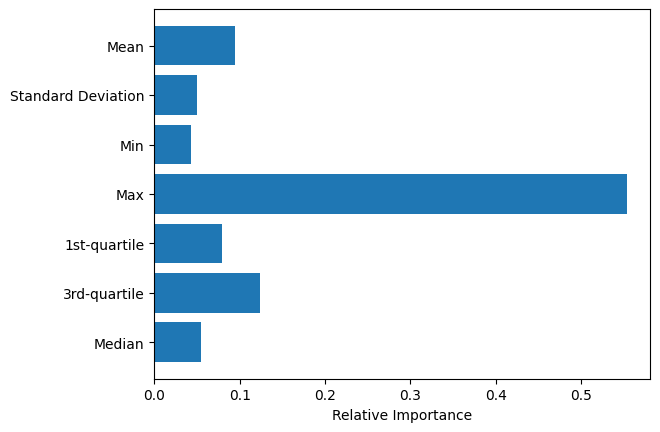

In [81]:
# Reference: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/
# plot importance scores
names = ['Mean', 'Standard Deviation','Min','Max','1st-quartile','3rd-quartile','Median']
ticks = [i for i in range(len(names))]
fig, ax = plt.subplots()
ax.barh(ticks, averages_features, align='center')
ax.set_yticks(ticks, labels=names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Relative Importance')
plt.show()

Reference: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

Based on the RandomForestRegression model, the most relative features are Max, 3rd quartile and then Mean.

## 2. ISLR 3.7.4

### (a) Linear Train

Answer: linear regression RSS is larger than cubic regression RSS.

When we are training data by using cubic regression based on 1oo observants, the highly flexible regression fits data more than the linear regression does.

### (b) Linear Test

Answer: Cubic regression RSS is larger than linear regression RSS.

Highly flexible cubic regression will perform well on fitting training data, and this also means cubic regression will overfit training data. Therefore, when we estimate the RSS from testing data, cubic regression RSS is larger than linear regression that performs not as fitting as cubic regression does on training data.

### (c) Not Linear Train

Answer: Cubic regression RSS is smaller than linear regression RSS

Even if there is not supposed to be regression relationship on data, the good flexibility of cubic regression makes cubic regression better fits on training data than linear regression. As the cubic regression fits better, the RSS will be smaller.  

### (d) Not Linear Testing

Answer: There is no enough information to tell

When we estimate the RSS on test data for our regression model, the value of estimated RSS is determined by the real relationship of data. For example, if the relationship is more like linear regression, we will refer the result of RSS we estimated for linear regression model(i.e RSS_test_linear< RSS_test_cubic), vice versa.

## 3. ISLR 3.7.3 - Extra Practice 

## 3. ISLR 3.7.5 - Extra Practice 